# Histograma

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## **Ler imagens**

In [2]:
def input_image(img_path, is_gray=False):
   #importa o image read da biblioteca CV2
   img = cv2.imread(img_path) if not is_gray else cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
   #img_new = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if is_gray else cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   
   return img

In [3]:
''''
    Função para ler imagem
    params:
        - img_path: caminho da imagem
        - is_gray: se é True a imagem retornada será em 8Bits - escala de cinza
    return:
         - img_gray: imagem em escla de cinza ou RGB
'''
img_gray = input_image(os.path.join("..", "Imagens", "equalizacao.tif"), is_gray=True)

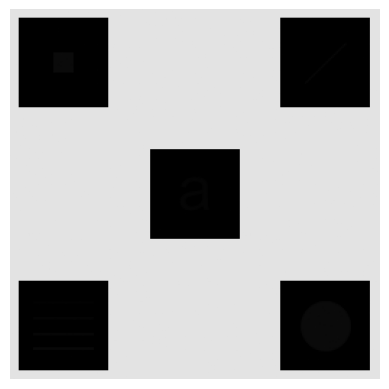

In [4]:
'''
    Mostrar na imagem
    params:
        - image: imagem lida em np.array
        - vmin: valor minimo
        - vmax: valor máximo
        - cmap: gray é o mapa de cores 8Bits
'''
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

In [7]:
img_gray1 = input_image(os.path.join("..", "Imagens","Fig0316(1)(top_left).tif"), is_gray=True)
img_gray2 = input_image(os.path.join("..", "Imagens","Fig0316(2)(2nd_from_top).tif"), is_gray=True)
img_gray3 = input_image(os.path.join("..", "Imagens","Fig0316(3)(third_from_top).tif"), is_gray=True)

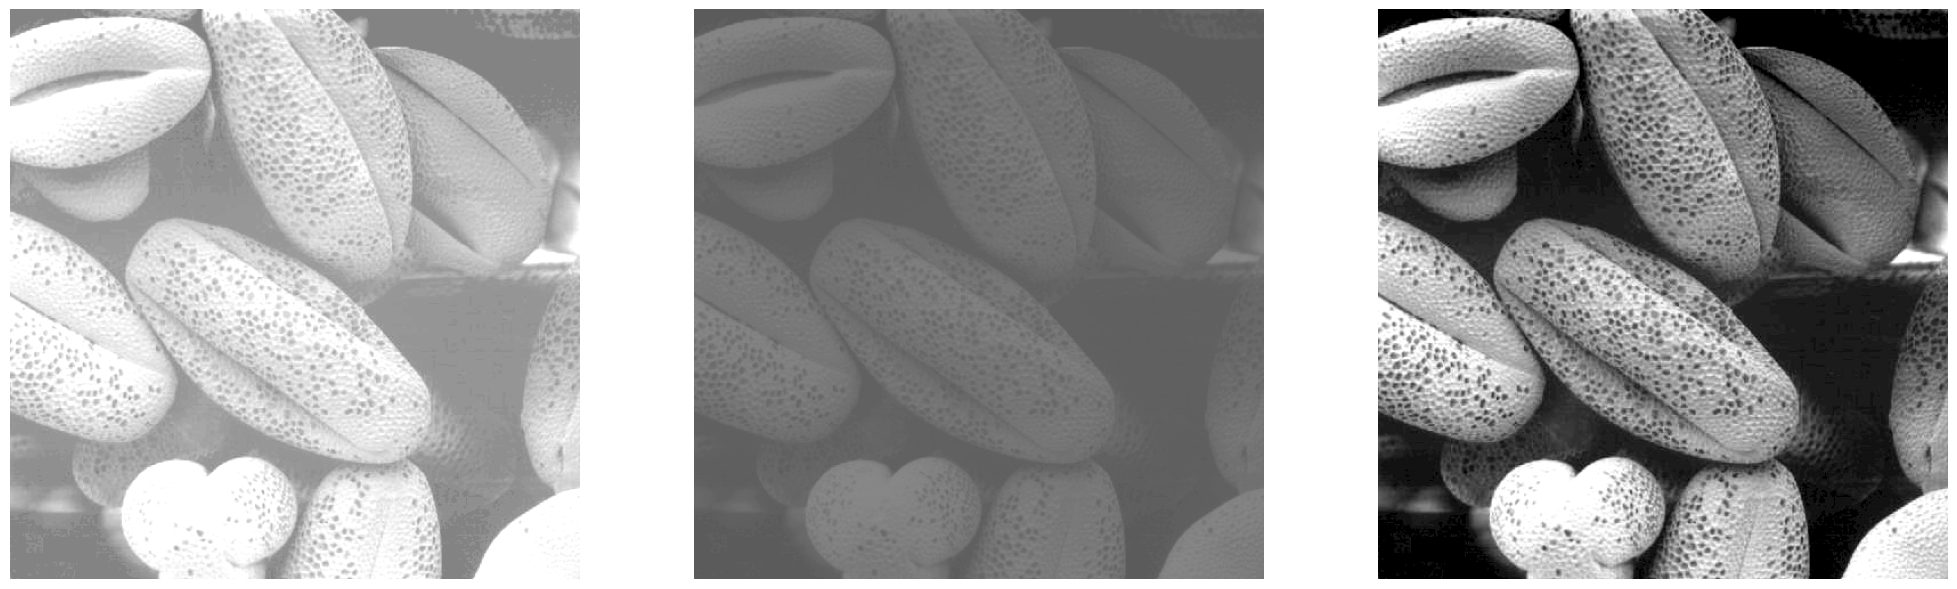

In [8]:
plt.figure(figsize=(25, 10))

plt.subplot(131)
plt.imshow(img_gray1, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(132)
plt.imshow(img_gray2, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(133)
plt.imshow(img_gray3, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.show()

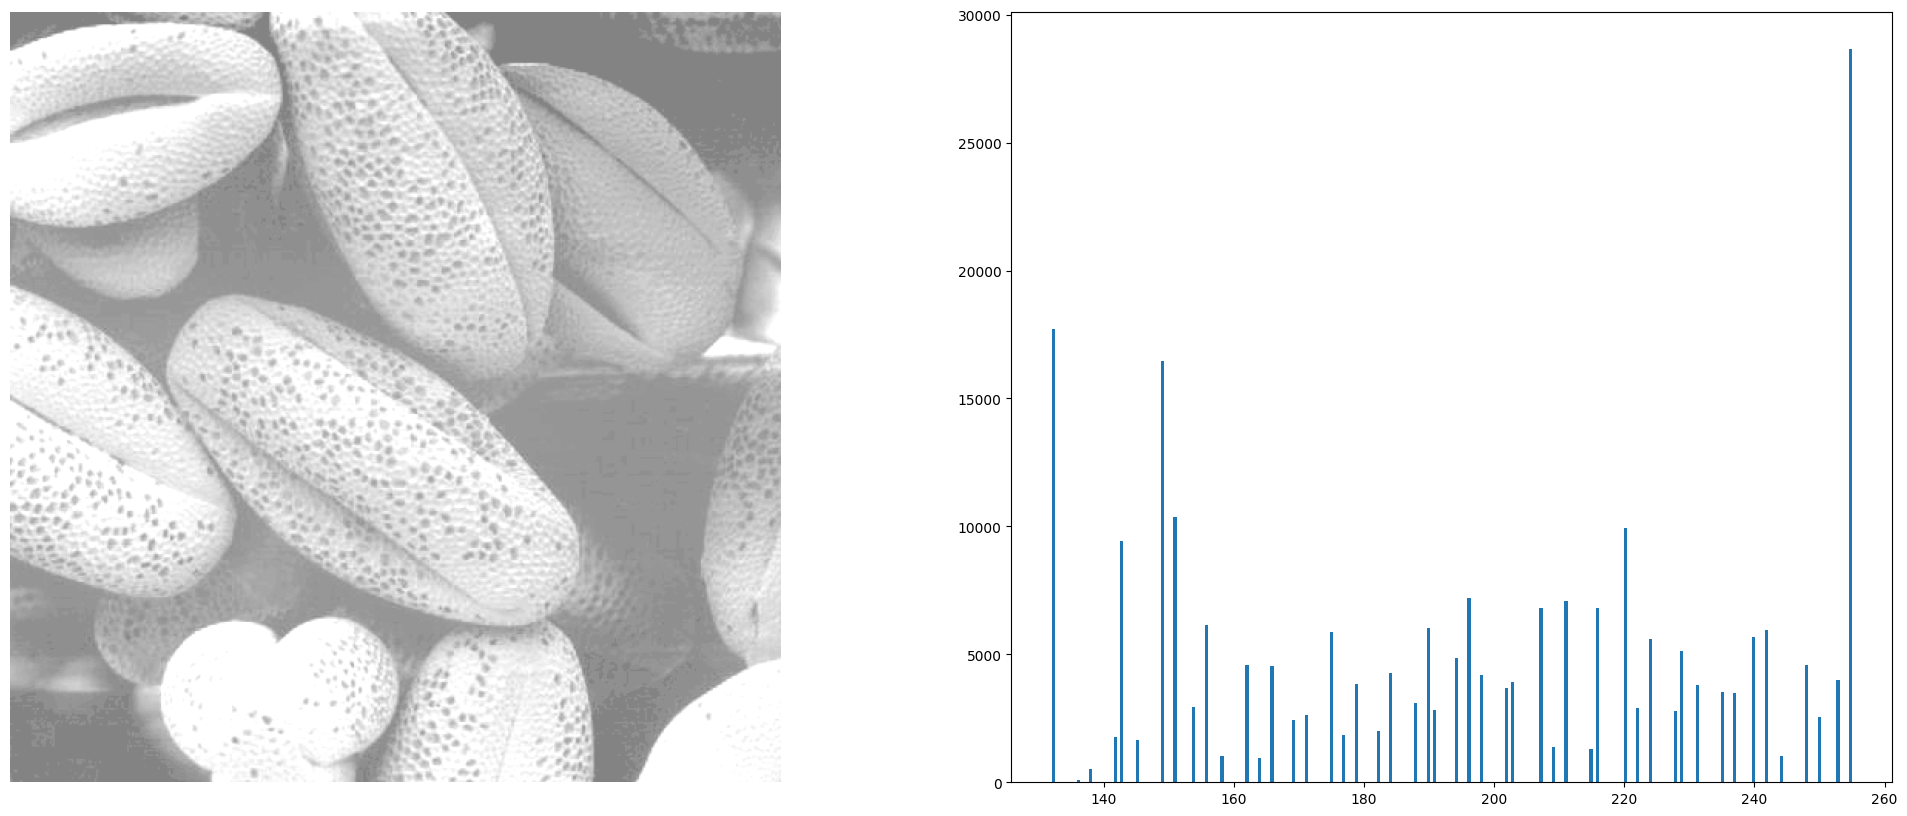

In [130]:
plt.figure(figsize=(25, 10))

plt.subplot(121)
plt.imshow(img_gray1, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
  
plt.subplot(122)
plt.hist(img_gray1.flatten(), bins=256)

plt.show()

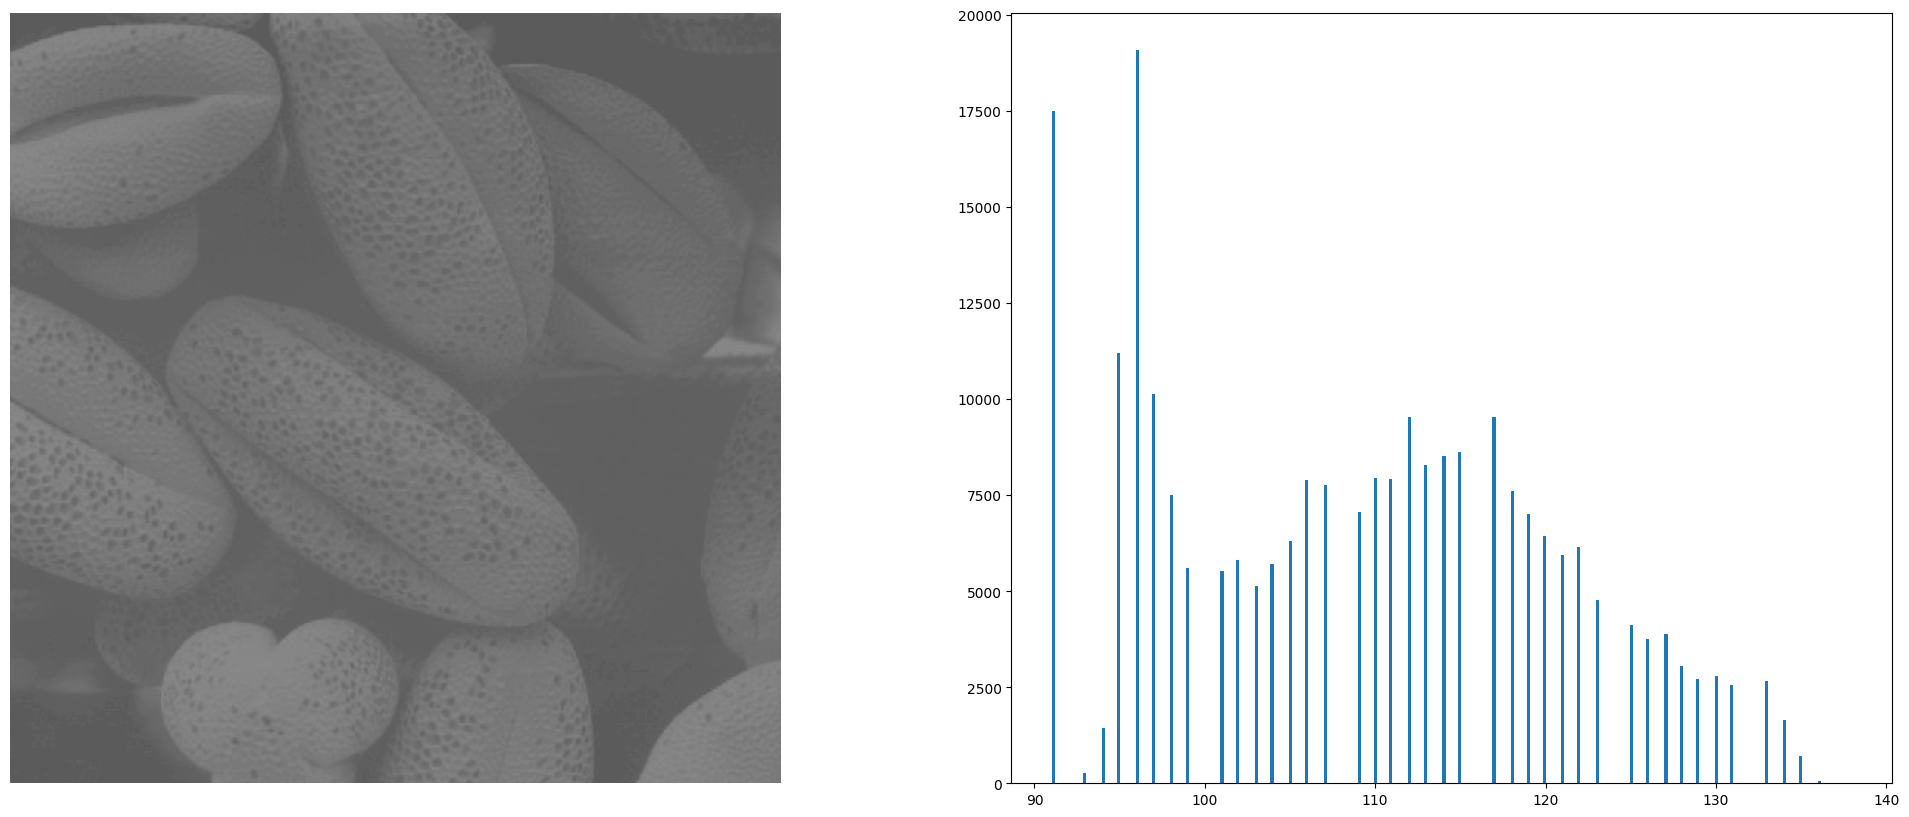

In [132]:
plt.figure(figsize=(25, 10))

plt.subplot(121)
plt.imshow(img_gray2, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.hist(img_gray2.flatten(), bins=256)

plt.show()

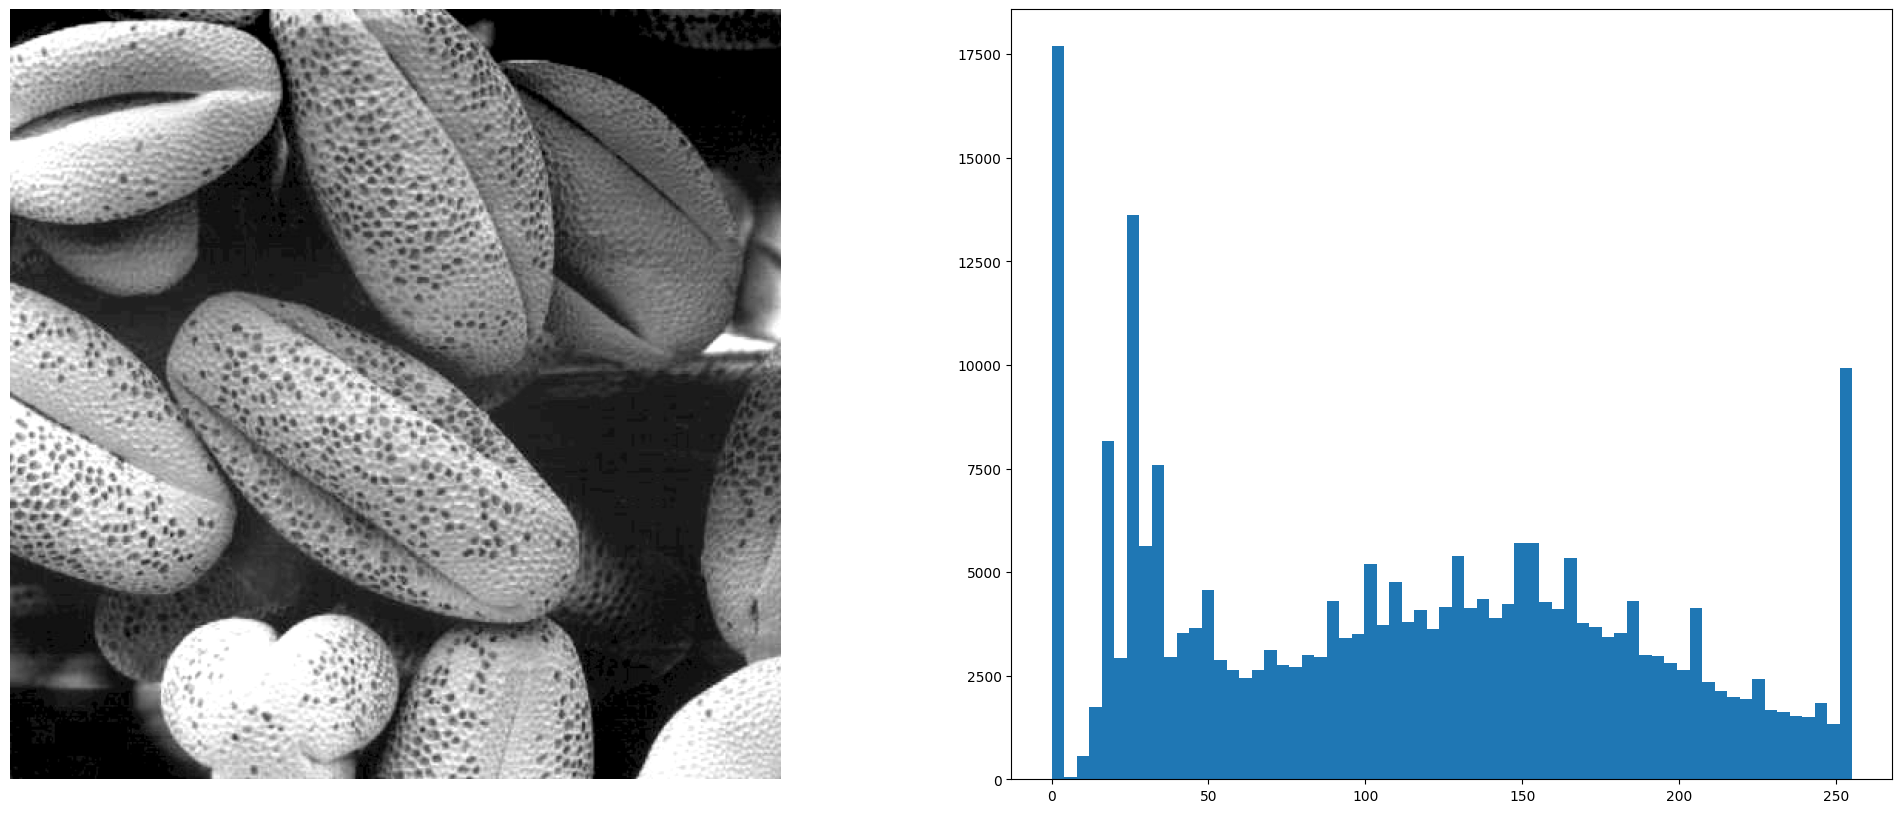

In [73]:
plt.figure(figsize=(25, 10))

plt.subplot(121)
plt.imshow(img_gray3, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.hist(img_gray3.flatten(), bins=64)

plt.show()

In [ ]:
## **Histograma visão geral**

## **Histograma de cores**

In [21]:
'''
    Função que calcula o histograma de cores da imagem
    params:
        - image: imagem flatten np.array que será calculado o histograma
        - n_bins: números de que o histograma terá
    return:
        - hist: (np.array) histograma 1d da image
        - bins: (np.array) lista de intervalos de bins calculados
'''
def histogram(image, bins=256):
    #calcula a frequencia de pixels na imagem
    hist = np.array([np.sum(image == i) for i in range(bins)])
     
    return np.array(hist)

In [22]:
n_bins = 256

In [23]:
#calculo do histograma utilizando a função desenvolvida
hist = histogram(img_gray, bins=256)

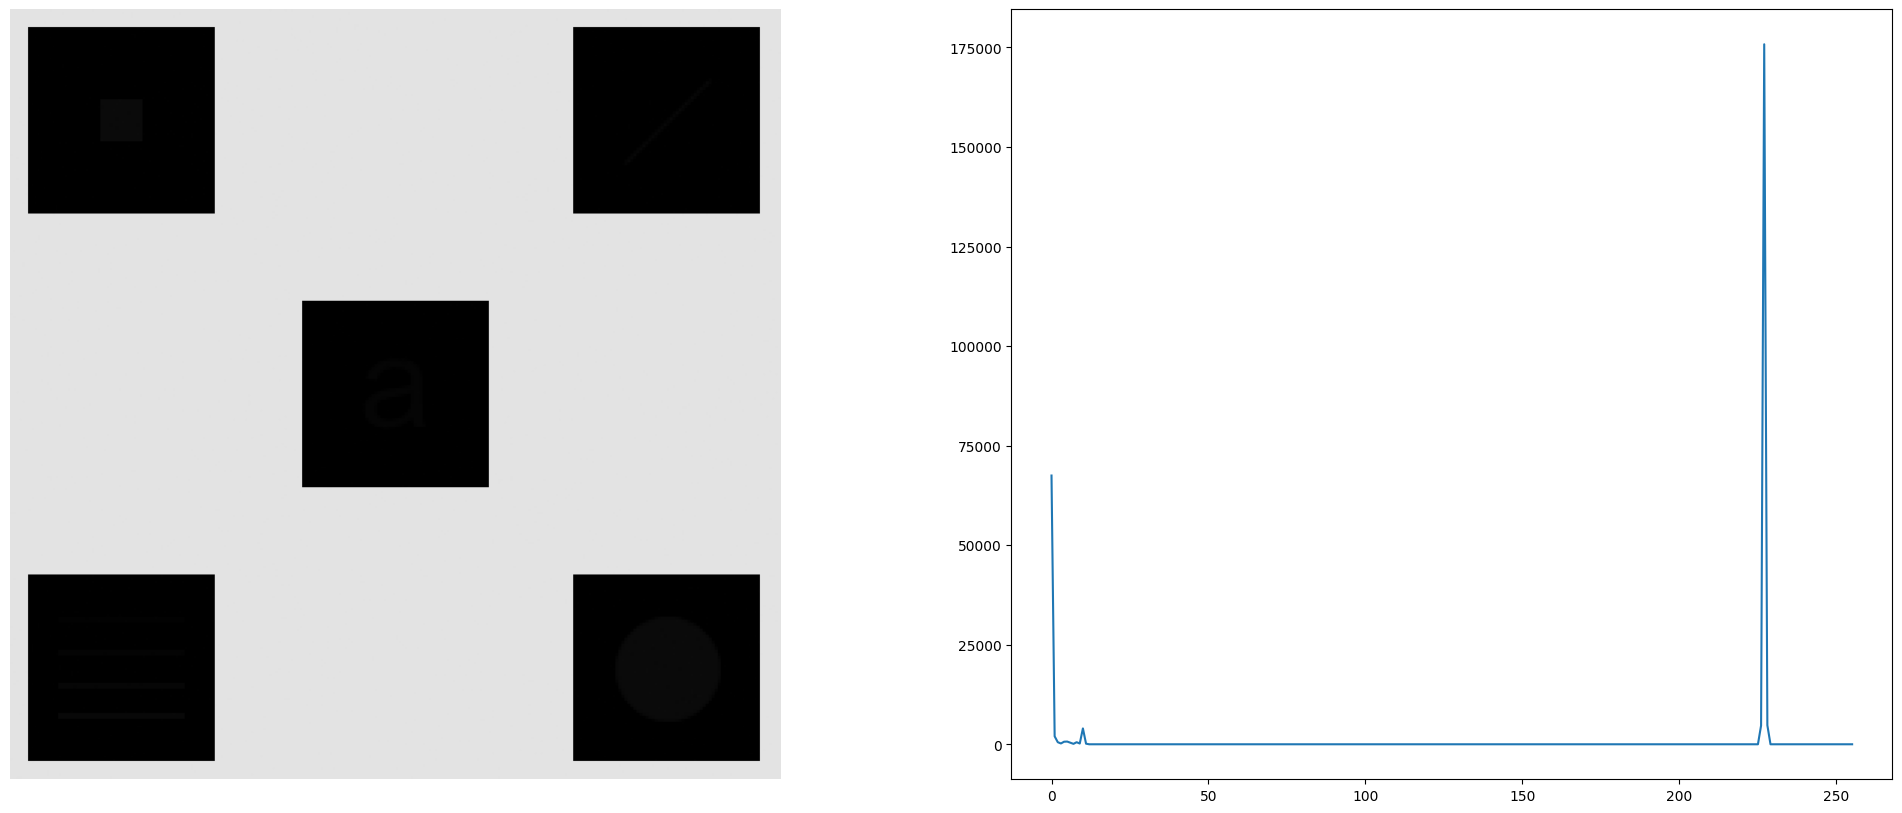

In [25]:
plt.figure(figsize=(25,10))

plt.subplot(121)
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.plot(range(n_bins), hist)
plt.show()

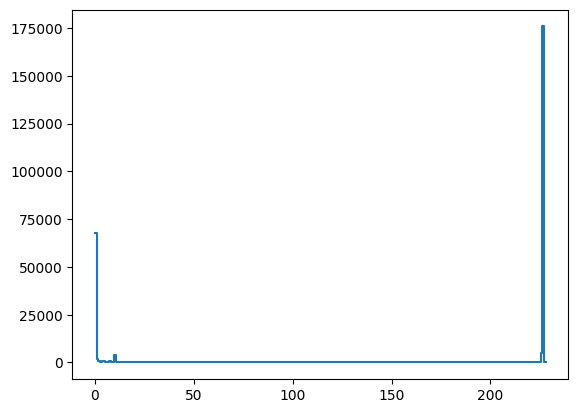

In [42]:
plt.plot(bins, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')
plt.show()

**Matplotlib**

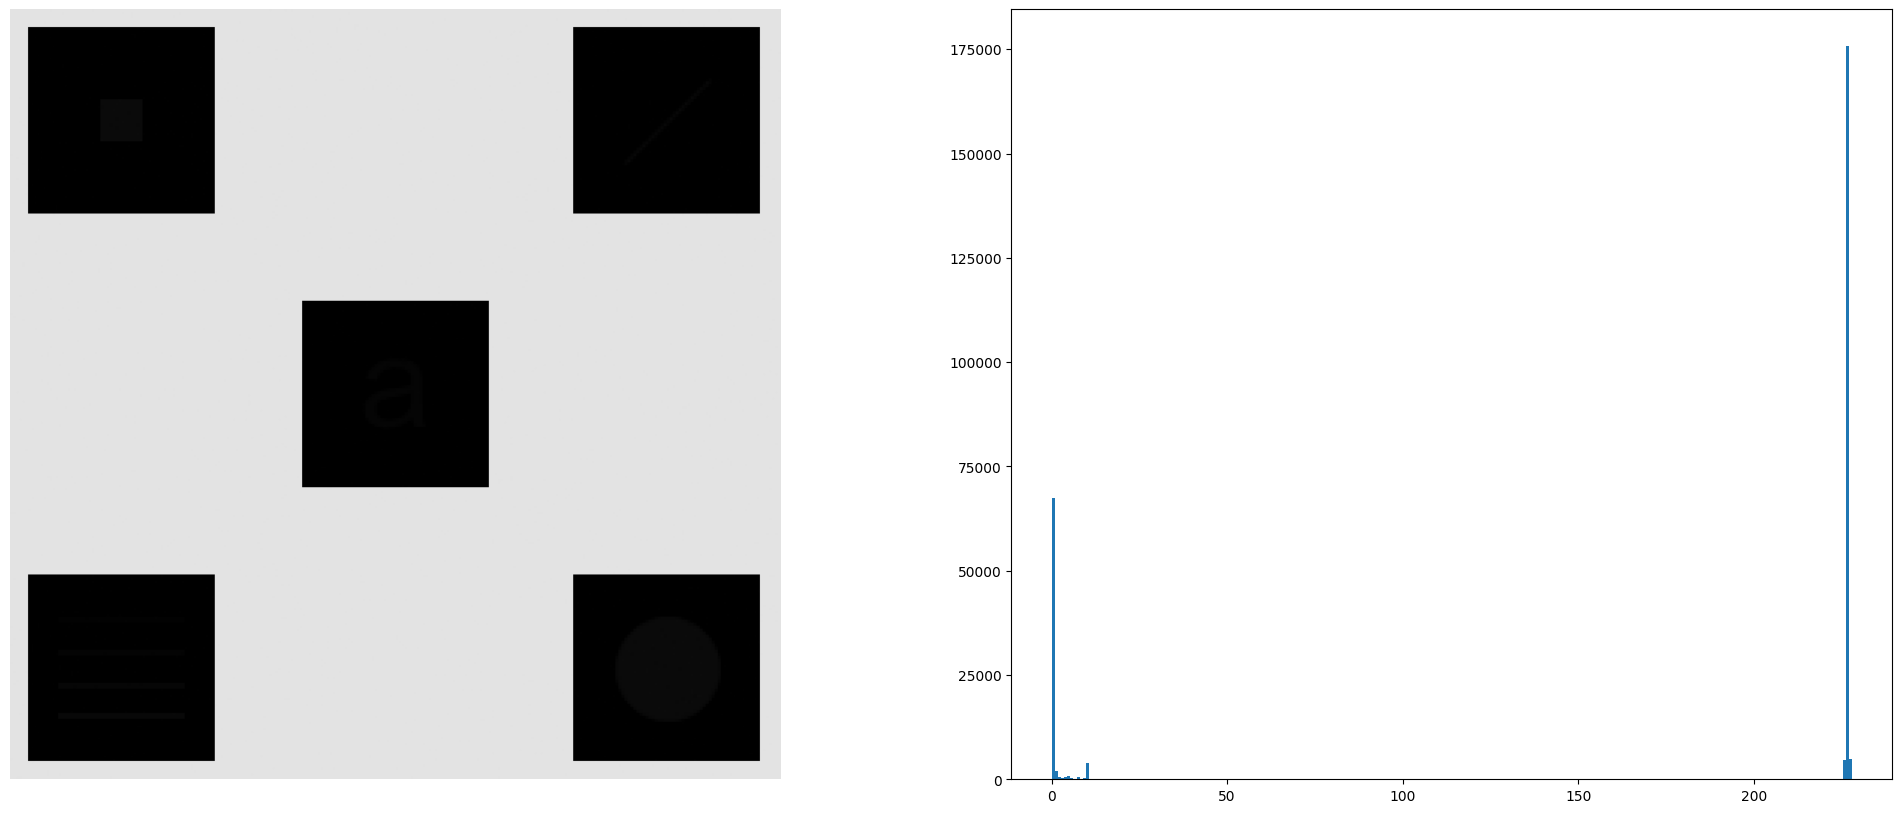

In [43]:
plt.figure(figsize=(25,10))

plt.subplot(121)
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.hist(img_gray.flatten(), bins=n_bins)
plt.show()

**Numpy**

In [44]:
hist, bins = np.histogram(img_gray.flatten(), bins=n_bins)

In [ ]:
bins

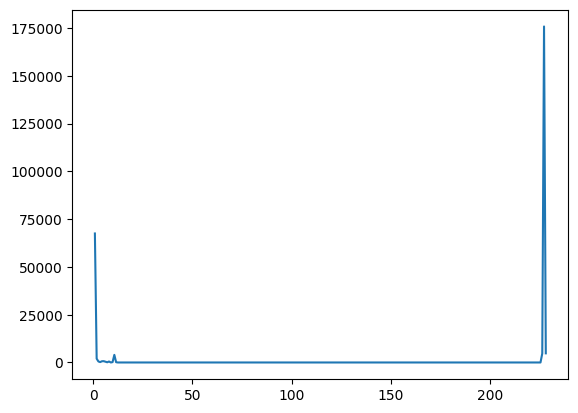

In [46]:
plt.plot(bins[1:], hist)
plt.show()

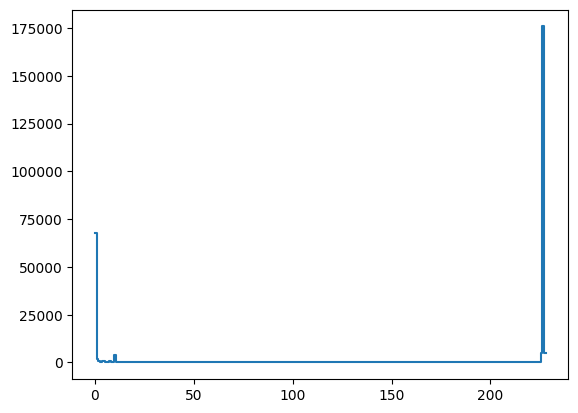

In [47]:
plt.plot(bins, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')
plt.show()

**OpenCV**

In [50]:
'''
    ler histograma utilizando CV2
    params:
        - images: lsita de images que serão calculado o histograma
        - channels: list de canais da images, se 0 é escala de cinza
        - mask: None
        - histSize: numeros de bins
        - ranges: intervalo de valores de pixels da imagem [0,255]
'''
hist = cv2.calcHist(images=[img_gray], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

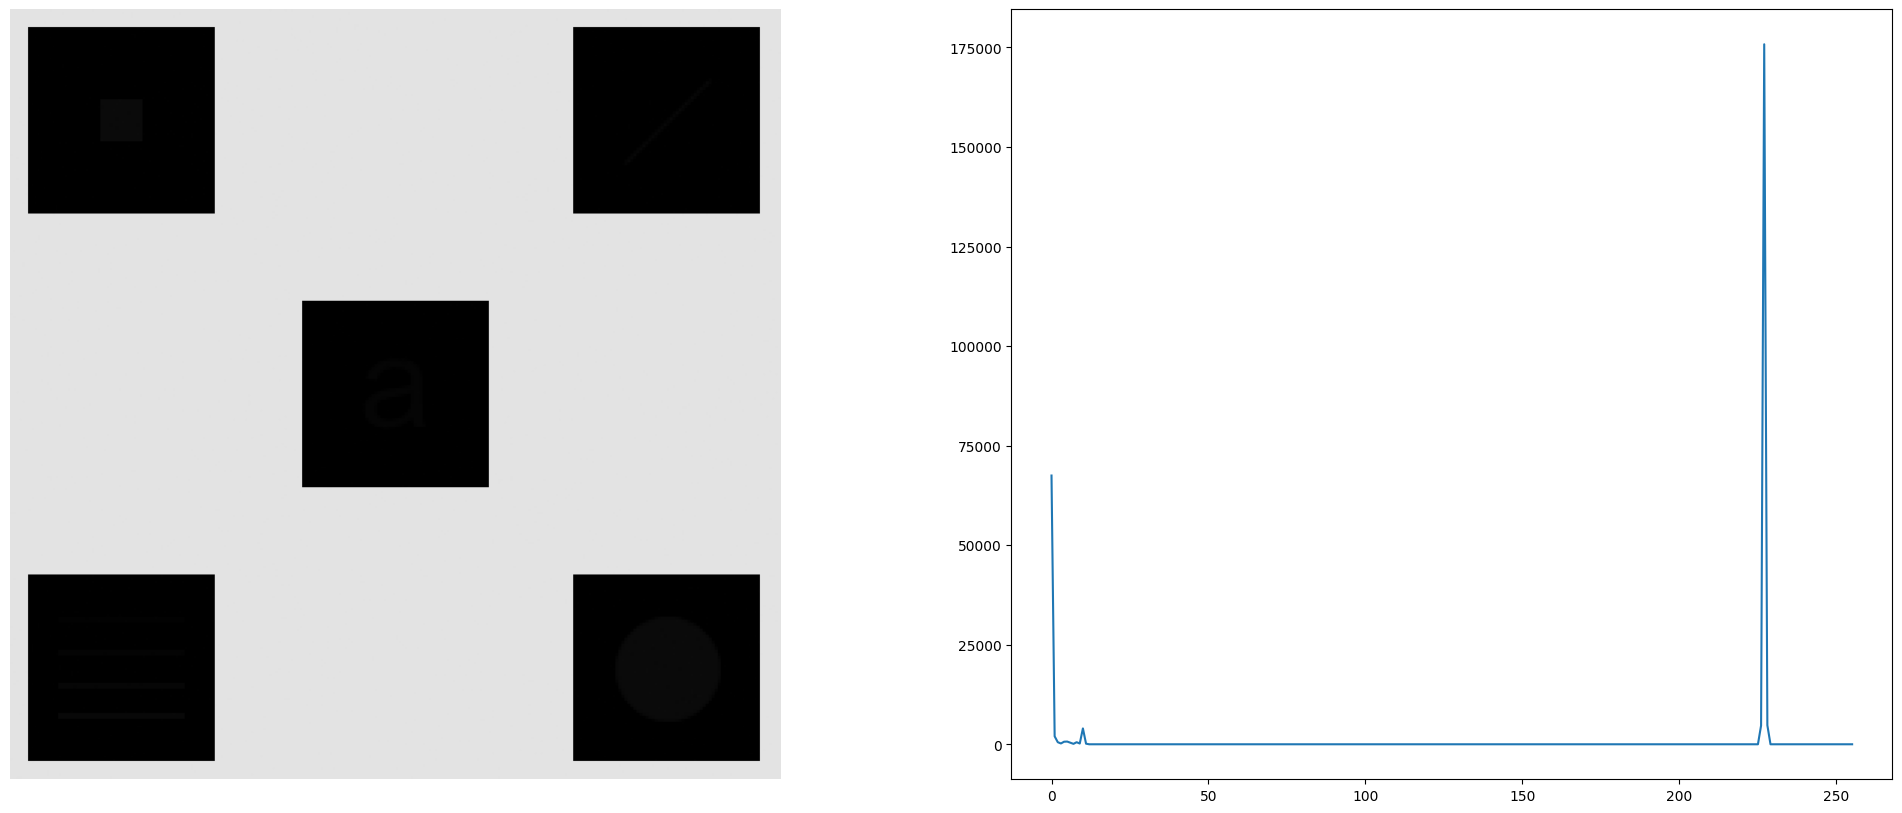

In [180]:
plt.figure(figsize=(25,10))

plt.subplot(121)
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.plot(hist)
plt.show()

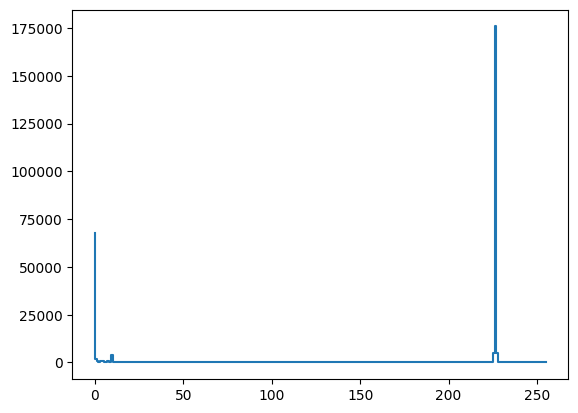

In [52]:
plt.plot(hist, '-', drawstyle='steps')
plt.show()

### Histograma Normalizado

In [31]:
'''
    Função que calcula o histograma normalizado da image
    params:
        - image: imagem flatten np.array que será calculado o histograma
        - n_bins: números de que o histograma terá
    return:
        - hist: (np.array) histograma 1d da image
        - bins: (np.array) lista de intervalos de bins calculados
'''
def normalized_histogram(image, bins=256):
    #calcula o histogram de cores utilizando a função anterior
    hist = histogram(image, bins)
    #calcula o tamanho da imagem x e y
    M, N = image.shape
    # calcula o histograma normalizado
    hist_c = np.array([np.sum(hist[:i+1])/(M*N) for i in range(len(hist))])
    
    return hist_c

In [33]:
hist_c = normalized_histogram(img_gray, bins=256)

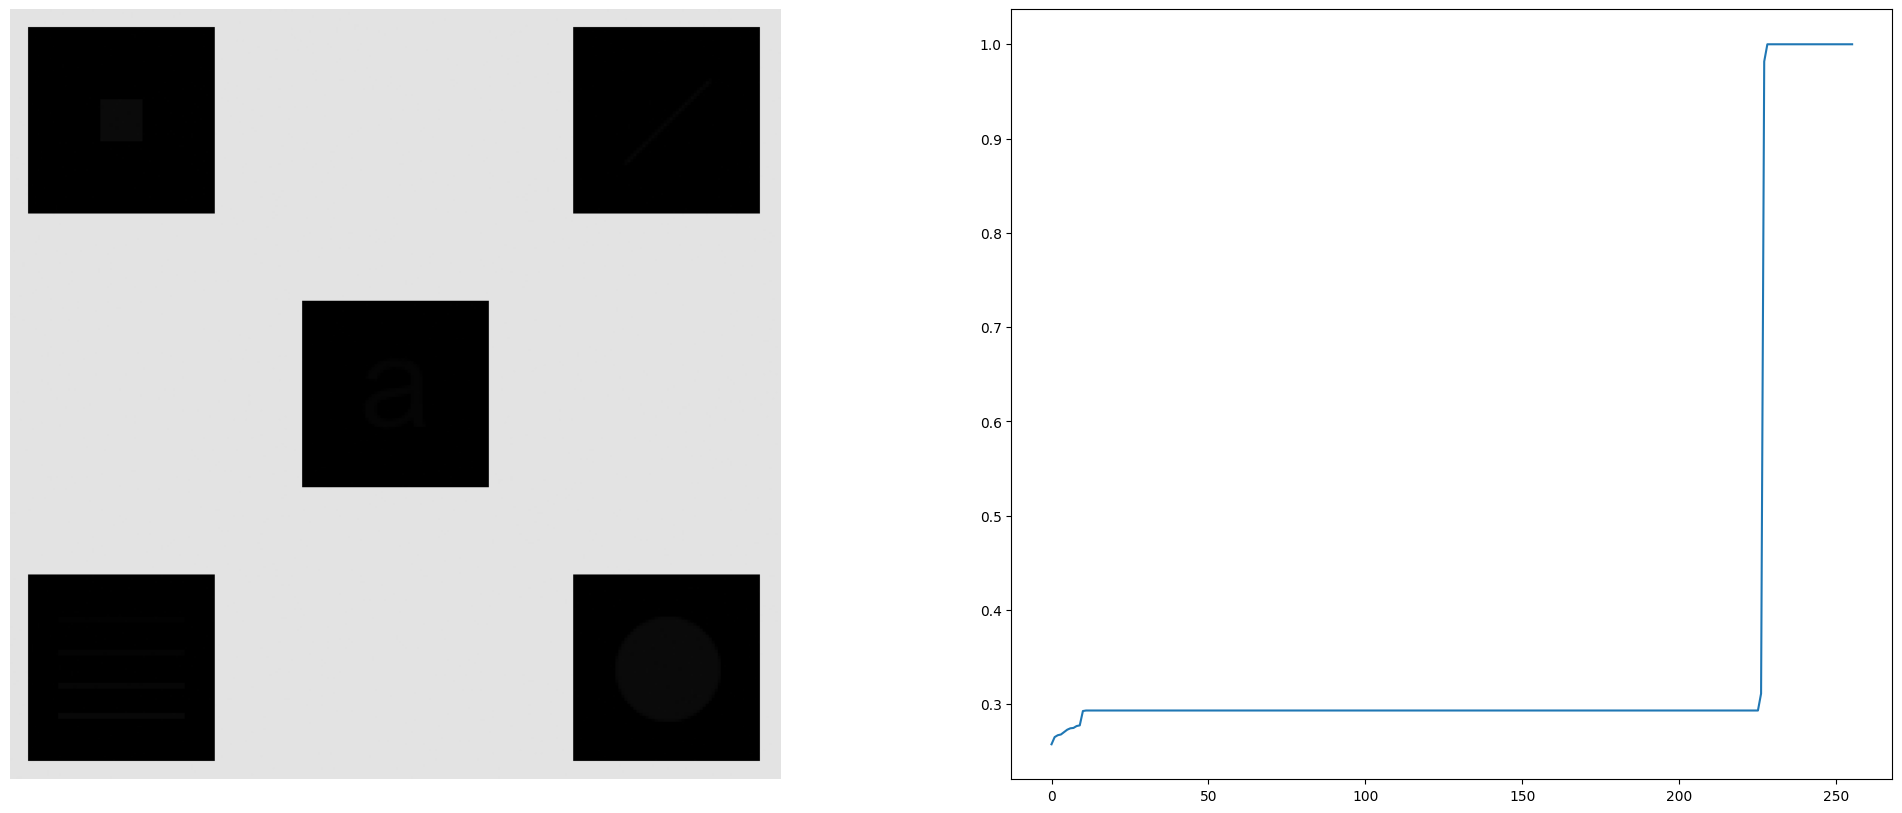

In [35]:
plt.figure(figsize=(25,10))

plt.subplot(121)
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.plot(range(256), hist_c)
plt.show()

### Equalização de histograma

$s_k = T(s) = \frac{L-1}{MN} \sum_{j=0}^{k} n_j$

In [43]:
'''
    Função de equalização de histograma
    params:
        - image: np.image que será equalizada
        - levels: (int) número de níveis de intensidade
    return:
        - eq_img: imagem equalizada
'''
def equalize(image, levels=256):
    #calcular o histograma de cores
    hist = histogram(image, bins=levels)
    #calcular o histograma acumulado
    sum_nj = hist.cumsum().astype(int)
    
    #coletar o tamanho na imagem no eixo M e N
    M,N = image.shape
    
    #Image limpa que terá os novos valores equalizados
    eq_img = np.zeros((M,N))
    
    for i in range(levels):
        #novo valor equalizado
        s = ((levels - 1)/float(M*N))*sum_nj[i]
        #passando o novo valor para a imagem
        eq_img[np.where(image == i)] = s
    
    return eq_img.astype(np.uint8)

In [47]:
#Define os níveis da image 256 -> Imagem 8bits
n_levels = 256

In [51]:
#calcula o histograma da imagem em escala de cinza
hist = histogram(img_gray.flatten(), bins=n_levels)
#Aplica equalização de histograma
eq_img = equalize(img_gray, levels=n_levels)
#Calcula o histograma da imagem equalizada
hist_eq = histogram(eq_img, bins=n_levels)

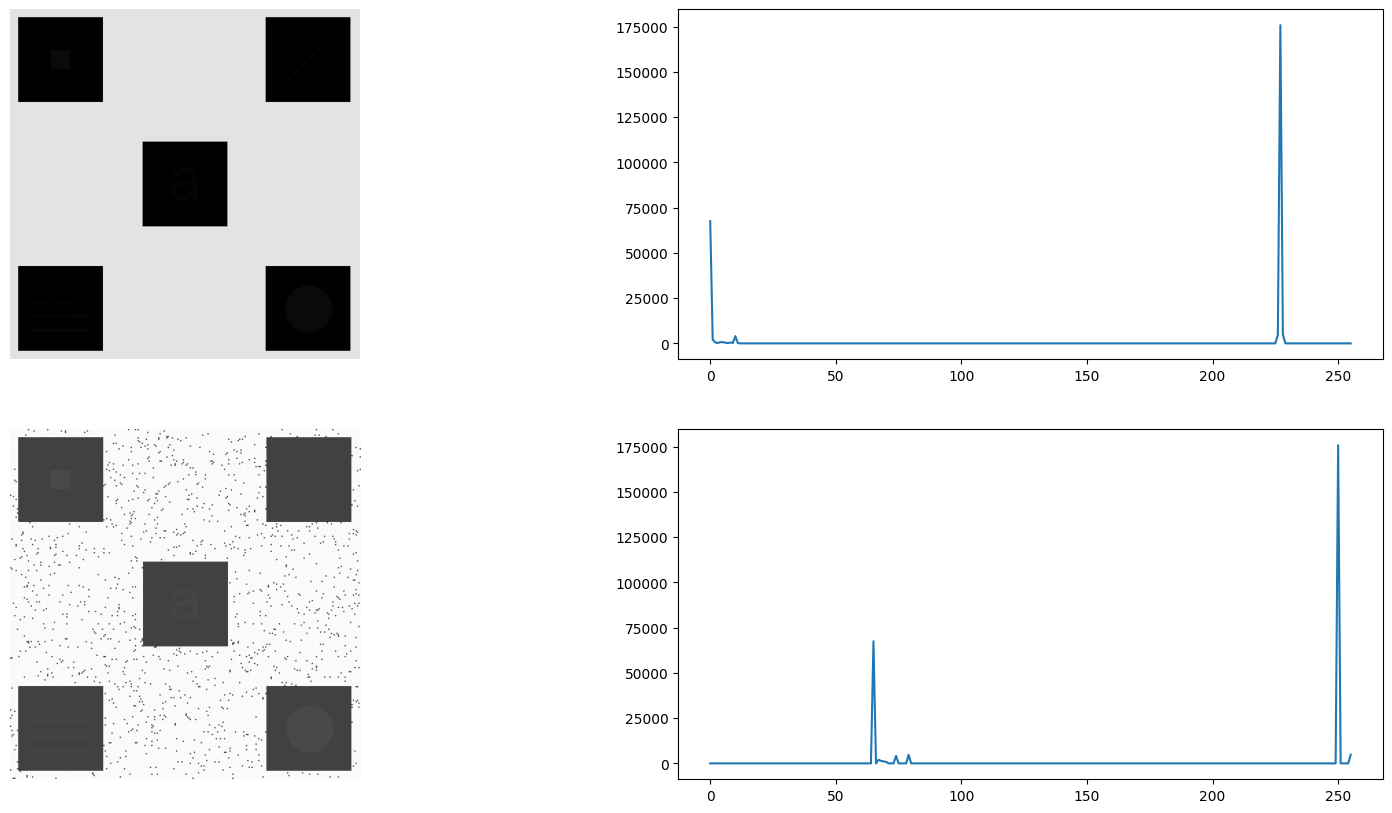

In [52]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(222)
plt.plot(range(n_levels), hist)

plt.subplot(223)
plt.imshow(eq_img, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(224)
plt.plot(range(n_levels), hist_eq)
#plt.hist(hist_eq.flatten(), bins=256)

plt.show()

In [ ]:
''''
    Função para ler imagem
    params:
        - img_path: caminho da imagem
        - is_gray: se é True a imagem retornada será em 8Bits - escala de cinza
    return:
         - img_gray: imagem em escla de cinza ou RGB
'''
img_gray_ = input_image(os.path.join("..", "Imagens", "equalizacao.tif"), is_gray=True)